In [1]:
from qm.qua import *
from qm.QuantumMachinesManager import QuantumMachinesManager
from configuration_resonator_spec import *
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from qm import SimulationConfig, LoopbackInterface
import Labber


from qm.octave import *
from qm.qua import *
import os
import time
from qualang_tools.units import unit
from set_octave import get_L0_and_IF


from qualang_tools.loops import from_array,get_equivalent_log_array
from qualang_tools.plot import interrupt_on_close
from qualang_tools.results import progress_counter, fetching_tool
from resonator_tools import circuit 

import sys
#Path for HQCPC7 
sys.path.append(r'C:\Users\HQClabo\Documents\Code\QuantumMachine\Guillaume\NonLinearRes_calib_30_03_2023\Analysis_Function\NonLinearRes')
sys.path.append(r'C:\Users\HQClabo\Documents\Code\QuantumMachine\Guillaume\NonLinearRes_calib_30_03_2023\Drivers\Drivers') #path for the analysis function

# #Path for HQC PC15 
# sys.path.append(r'C:\Users\hqclabo\Documents\Code\gbeaulieu\Analysis_Function\NonLinearRes')
# sys.path.append(r'C:\Users\hqclabo\Documents\Code\gbeaulieu\Drivers')
import AnFunc as an # analysis function
import imageio

from qualang_tools.units import unit
u = unit()

# Octave and OPX configuration

In [3]:
#Octave & OPX configuration  
Saving_Path=r"X:\Users\beaulieu\Data\Run01\131\\"
Cooldown_Date="2023_06_01"

opx_ip = '128.178.175.167'
opx_port = 81
octave_ip = '128.178.175.167'
octave_port = 53

octave_config = QmOctaveConfig()
octave_config.set_calibration_db(os.getcwd()) #Path to the calibration database 

octave_config.add_device_info('octave1', octave_ip, octave_port) #Add a device refered to as octave 1
octave_config.set_opx_octave_mapping([('con1', 'octave1')])  # Using the default mapping 

qmm = QuantumMachinesManager(host=opx_ip, port=opx_port, octave=octave_config)
qm = qmm.open_qm(config)

#Output for the resonator 
qmm.octave_manager.set_clock("octave1", ClockType.External, ClockFrequency.MHZ_10) # External clock on the octave 

#Mixers for the fluxline 
octave_output_gain=-10

#Upconversion 
qm.octave.set_lo_source("resonator", OctaveLOSource.Internal) # Use internal LO for the fluxline 
qm.octave.set_lo_frequency("resonator", LO_readout)  # Set the frequency of the LO 
qm.octave.set_rf_output_gain("resonator", octave_output_gain)  # can set gain from -10dB to 20dB
qm.octave.set_rf_output_mode("resonator", RFOutputMode.trig_normal)  # The LO to a trigger so that it is not always on 

#Down conversion 
qm.octave.set_qua_element_octave_rf_in_port("resonator", "octave1", 1) #input port 1 is set for the resonator 
qm.octave.set_downconversion("resonator", lo_source=RFInputLOSource.Internal)  # The LO for the demodulation is the interal LO  


2023-07-07 18:40:18,483 - qm - INFO - Performing health check
2023-07-07 18:40:18,495 - qm - WARNING -   HC Warning: Potential hardware issue with QSync in controller con1, multiple controllers sync cannot be guaranteed, please inform QM
2023-07-07 18:40:18,495 - qm - INFO - Health check passed


In [4]:
#Calibration of resonator frequency at the octave 
qm.octave.calibrate_element("resonator", [get_L0_and_IF(config, "resonator")])  
qm = qmm.open_qm(config)

2023-07-07 18:40:22,106 - qm - INFO - Flags: 
2023-07-07 18:40:22,107 - qm - INFO - Compiling program
2023-07-07 18:40:24,500 - qm - INFO - Sending pre-compiled program to QOP


In [32]:
config

{'version': 1,
 'controllers': {'con1': {'analog_outputs': {1: {'offset': -0.0098876953125},
    2: {'offset': 0.0549468994140625},
    3: {'offset': 0.0},
    4: {'offset': 0.0},
    5: {'offset': 0.0},
    6: {'offset': 0.0},
    7: {'offset': 0.0},
    8: {'offset': 0.0},
    9: {'offset': 0.0},
    10: {'offset': 0.0}},
   'digital_outputs': {1: {}, 2: {}, 3: {}, 4: {}, 5: {}},
   'analog_inputs': {1: {'offset': 0.0, 'gain_db': 0},
    2: {'offset': 0.0, 'gain_db': 0}}}},
 'elements': {'resonator': {'mixInputs': {'I': ('con1', 1),
    'Q': ('con1', 2),
    'lo_frequency': 4200000000.0,
    'mixer': 'octave_octave1_1'},
   'intermediate_frequency': 100000000.0,
   'operations': {'cw': 'const'},
   'digitalInputs': {'switch': {'port': ('con1', 1),
     'delay': 126,
     'buffer': 0}},
   'outputs': {'out1': ('con1', 1), 'out2': ('con1', 2)},
   'time_of_flight': 24,
   'smearing': 0}},
 'pulses': {'const': {'operation': 'measurement',
   'length': 1000,
   'waveforms': {'I': 'const_

FSW 0.125 volt outside of 1 with 20 db attenuation input of spectrum 

- 0.85 : 2.35 mV
- 0.95 : 2.62 mV
- 1.05 : 2.90
- 1.15 : 3.17 
- 1.25 : 3.44

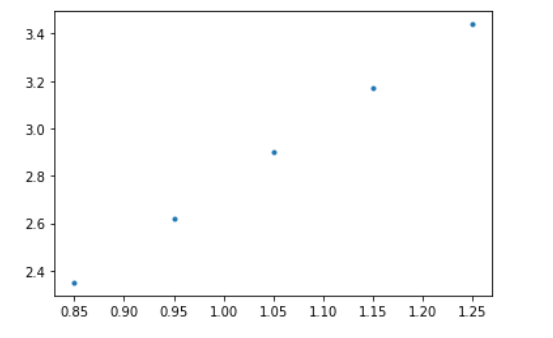

signal hound software :

- 0.85 = 2.44 mV
- 0.95 = 2.72 mV
- 1.05 = 3.01 mV
- 1.15 = 3.29 mV
- 1.25 = 3.58 mV


In [74]:
4.47967

1.7918679999999997e-05

In [97]:
np.array([10.916,12.1873,13.469,14.754,16.042])/np.array([2.35 ,2.62,2.90,3.17,3.44])

array([4.64510638, 4.65164122, 4.64448276, 4.65425868, 4.66337209])

In [79]:
np.array([2.46 ,2.75,3.04,3.34,3.62])/np.array([2.35 ,2.62,2.90,3.17,3.44])

array([1.04680851, 1.04961832, 1.04827586, 1.05362776, 1.05232558])

In [98]:
np.array([2.35 ,2.62,2.90,3.17,3.44])/np.array([2.44 ,2.72,3.01,3.29,3.58])


array([0.96311475, 0.96323529, 0.96345515, 0.96352584, 0.96089385])

signal hound software :

- 0.85 = 10.916 mV
- 0.95 = 12.1873 mV
- 1.05 = 13.469 mV
- 1.15 = 14.754 mV
- 1.25 = 16.042 mV


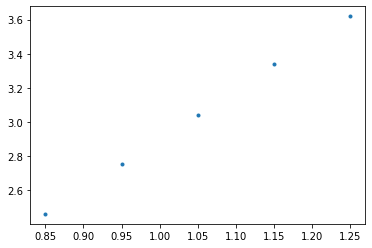

In [65]:
plt.plot([0.85,0.95,1.05,1.15,1.25],[2.46,2.75,3.04,3.34,3.62],'.')

In [59]:
2.90/2.62

1.1068702290076335

In [7]:
pulse_amp=0.125
config,qm=update_pulse_amplitude(pulse_amp,config,qmm)

In [10]:
# Check the up-conversion for the calibration by playing the cw for ininite time 

amp_factor=1.25

with program() as hello_octave:
    with infinite_loop_():
        play("cw"*amp(amp_factor), "resonator")
        
job = qm.execute(hello_octave)
#time.sleep(10)  # The program will run for 1 minute


2023-07-07 19:04:20,635 - qm - INFO - Flags: 
2023-07-07 19:04:20,636 - qm - INFO - Sending program to QOP
2023-07-07 19:04:20,658 - qm - INFO - Executing program


In [9]:
job.halt()

True

In [6]:
#Useful functions 

def update_readout_lenght(Readout_Len,config,qmm):
    """ Update the readout length in the configuration file"""

    config["pulses"]["const"]["length"]=Readout_Len
    config["integration_weights"]["cosine_weights"]["cosine"][0]=(1.0, Readout_Len)
    config["integration_weights"]["cosine_weights"]["sine"][0]=(0.0, Readout_Len)
    config["integration_weights"]["sine_weights"]["cosine"][0]=(0.0, Readout_Len)
    config["integration_weights"]["sine_weights"]["sine"][0]=(1.0, Readout_Len)
    config["integration_weights"]["minus_sine_weights"]["cosine"][0]=(0.0, Readout_Len)
    config["integration_weights"]["minus_sine_weights"]["sine"][0]=(-1.0, Readout_Len)


    #Update the config with the modified values above 
    qm = qmm.open_qm(config)
    
    return config, qm


def update_pulse_amplitude(pulse_amp,config,qmm):
    """ Update the pulse_amplitude of the qm in the configuration file """

    config["waveforms"]["const_wf"]['sample']=pulse_amp
    
    #Update the config with the modified values above 
    qm = qmm.open_qm(config)
    
    return config, qm

def update_time_of_flight(time_of_flight,config,qmm):
    """ Update the time_of_flight of the qm in the configuration file """
    config["elements"]["resonator"]["time_of_flight"]=time_of_flight
    
    qm=qmm.open_qm(config)
    
    return config, qm

def update_offset(offset_1, offset_2,config,qmm):
    """ Update the input offsets of the qm in the configuration file """
    
    config['controllers']["con1"]["analog_inputs"][1]['offset']=offset_1
    config['controllers']["con1"]["analog_inputs"][2]['offset']=offset_2
    
    
    qm=qmm.open_qm(config)
    
    return config, qm

# RAW ADC check and demodulation check
This allows checking that the ADC is not saturated, correct for DC offsets and define the time of flight.

We can see from the figure that the time_of_flight parameter has two uses: First, it determines the time from the beginning of the readout pulse and until the beginning of the integration operation (d) and secondly, it sets the start of the ADC recording window, up to smearing, in (g). It is also important to note that the demod window length is set solely by the length of the integration weights vector. The length of the raw ADC data recording window is set by the length of the readout pulse as well as the smearing parameter.

In [31]:
pulse_amp=0.125
config,qm=update_pulse_amplitude(pulse_amp,config,qmm)


gain=0
config['controllers']['con1']['analog_inputs'][1]["gain_db"]=gain
config['controllers']['con1']['analog_inputs'][2]["gain_db"]=gain
qm = qmm.open_qm(config)

In [4]:
%matplotlib qt

#Sets the pulse length and the pulse amplitude at the resonator 
pulse_len=50_000
config,qm=update_readout_lenght(pulse_len,config,qmm)
pulse_amp=0.125
config,qm=update_pulse_amplitude(pulse_amp,config,qmm)    
time_of_flight=280 # minimum 
config,qm=update_time_of_flight(time_of_flight,config,qmm)
offset_1=0.01782622084960938
offset_2=0.015536664150390626
config,qm=update_offset(offset_1, offset_2,config,qmm)

amp_factor=0.01 #Amplitude factor of the resonator 
n_avg = 1000  # Number of averaging loops
cooldown_time = 50_000 // 4 #cooldown time between the averages

with program() as raw_trace_prog:
    n = declare(int)
    adc_st = declare_stream(adc_trace=True)

    with for_(n, 0, n < n_avg, n + 1):
        reset_phase("resonator")
        measure("cw"*amp(amp_factor), "resonator", adc_st)
        wait(cooldown_time, "resonator")

    with stream_processing():
        
        # Will save average:
        adc_st.input1().average().save("adc1")
        adc_st.input2().average().save("adc2")
        
        # Will save only last run:
        adc_st.input1().save("adc1_single_run")
        adc_st.input2().save("adc2_single_run")

#Execute the program     
qm = qmm.open_qm(config)
job = qm.execute(raw_trace_prog)

results = fetching_tool(job, data_list=["adc1", "adc2", "adc1_single_run","adc2_single_run"], mode="wait_for_all")

adc1, adc2, adc1_single_run, adc2_single_run = results.fetch_all()

adc1 = u.raw2volts(adc1)
adc2 = u.raw2volts(adc2)
adc1_single_run = u.raw2volts(adc1_single_run)
adc2_single_run = u.raw2volts(adc2_single_run)

#Plotting 
plt.figure()
plt.subplot(121)
plt.title("Single run")
plt.plot(adc1_single_run, label="Input 1")
plt.plot(adc2_single_run, label="Input 2")
plt.xlabel("Time [ns]")
plt.ylabel("Signal amplitude [V]")
plt.legend()

plt.subplot(122)
plt.title("Averaged run")
plt.plot(adc1, label="Input 1")
plt.plot(adc2, label="Input 2")
plt.xlabel("Time [ns]")
plt.legend()
plt.tight_layout()

print("The mean offset of port 1 is: {}".format(np.mean(adc1)))
print("The mean offset of port 2 is: {}".format(np.mean(adc2)))

2023-06-30 17:23:46,468 - qm - INFO - Flags: 
2023-06-30 17:23:46,469 - qm - INFO - Sending program to QOP
2023-06-30 17:23:46,499 - qm - INFO - Executing program
The mean offset of port 1 is: 7.2033642578125026e-06
The mean offset of port 2 is: 8.657791992187501e-05


## Measure of the demodulated signal 

Measure the demodulated signal at a single frequency. Program simply to show that you need to optimize the time of flight otherwise, for short readout time you measure 0. 


In [62]:
%matplotlib qt

#Sets the pulse length and the pulse amplitude at the resonator 
pulse_len=100_000
config,qm=update_readout_lenght(pulse_len,config,qmm)
pulse_amp=0.125/2
config,qm=update_pulse_amplitude(pulse_amp,config,qmm)    
time_of_flight=280 # minimum 24
config,qm=update_time_of_flight(time_of_flight,config,qmm)


amp_factor=0.05#Amplitude factor of the resonator 
n_avg = 100  # Number of averaging loops
cooldown_time = 100_000 // 4 #cooldown time between the averages in ns

with program() as raw_trace_prog:
   
    n = declare(int)
    I = declare(fixed)
    Q = declare(fixed)
    I_st = declare_stream()
    Q_st = declare_stream()
    
    with for_(n, 0, n < n_avg, n + 1):
        measure(
            "cw"*amp(amp_factor),
            "resonator",
            None,
            dual_demod.full("cos", "out1", "sin", "out2", I),
            dual_demod.full("minus_sin", "out1", "cos", "out2", Q),
        )

        wait(cooldown_time, "resonator")
        
        save(I, I_st)
        save(Q, Q_st)
            
    with stream_processing():

        I_st.save_all("I")
        Q_st.save_all("Q")

qm = qmm.open_qm(config)
job = qm.execute(raw_trace_prog)

results = fetching_tool(job, data_list=["I","Q"], mode="wait_for_all")

I, Q = results.fetch_all()

I = u.demod2volts(I, pulse_len)
Q = u.demod2volts(Q, pulse_len)

plt.figure()
plt.subplot(121)
plt.title("Single run")
plt.plot(I, label="I")
plt.plot(Q, label="Q")
plt.plot(np.sqrt(I**2+Q**2), label="Norm")
plt.xlabel("Time [ns]")
plt.ylabel("Signal amplitude [V]")
plt.legend()

print("The SNR on I : {}".format(np.mean(I)/np.sqrt(np.var(I))))
print("The SNR on Q : {}".format(np.mean(Q)/np.sqrt(np.var(Q))))
print("The SNR on total : {}".format(np.mean(np.sqrt(Q**2+I**2))/np.sqrt(np.var(np.sqrt(Q**2+I**2)))))

2023-04-07 13:04:04,217 - qm - INFO - Flags: 
2023-04-07 13:04:04,218 - qm - INFO - Sending program to QOP
2023-04-07 13:04:05,631 - qm - INFO - Executing program
The SNR on I : -10.91218870976442
The SNR on Q : -12.170314996916927
The SNR on total : 18.869194367655414


# Dispaly parameters

In [10]:
#Setting the gain
gain=0
config['controllers']['con1']['analog_inputs'][1]["gain_db"]=gain
config['controllers']['con1']['analog_inputs'][2]["gain_db"]=gain
qm = qmm.open_qm(config)

time_of_flight=280
config, qm=update_time_of_flight(time_of_flight,config,qmm)

pulse_amp=0.125
config,qm=update_pulse_amplitude(pulse_amp,config,qmm)   


In [14]:
print("LO of resonator : {} GHz".format(config['elements']['resonator']["mixInputs"]["lo_frequency"]/1e9))
print("IF of resonator : {} GHz".format(config['elements']['resonator']['intermediate_frequency']/1e9))
print("Time of flight of resonator : {} ns".format(config['elements']['resonator']['time_of_flight']))
print("Readout time resonator : {} ns".format(config["pulses"]['const']["length"]))
print("Amplitude of the readout pulse : {} V".format( config["waveforms"]["const_wf"]['sample']))


LO of resonator : 4.2 GHz
IF of resonator : 0.1 GHz
Time of flight of resonator : 280 ns
Readout time resonator : 50000 ns
Amplitude of the readout pulse : 0.125 V


In [19]:
config

{'version': 1,
 'controllers': {'con1': {'analog_outputs': {1: {'offset': -0.0098876953125},
    2: {'offset': 0.0549468994140625},
    3: {'offset': 0.0},
    4: {'offset': 0.0},
    5: {'offset': 0.0},
    6: {'offset': 0.0},
    7: {'offset': 0.0},
    8: {'offset': 0.0},
    9: {'offset': 0.0},
    10: {'offset': 0.0}},
   'digital_outputs': {1: {}, 2: {}, 3: {}, 4: {}, 5: {}},
   'analog_inputs': {1: {'offset': 0.01782622084960938, 'gain_db': 0},
    2: {'offset': 0.015536664150390626, 'gain_db': 0}}}},
 'elements': {'resonator': {'mixInputs': {'I': ('con1', 1),
    'Q': ('con1', 2),
    'lo_frequency': 4200000000.0,
    'mixer': 'octave_octave1_1'},
   'intermediate_frequency': 100000000.0,
   'operations': {'cw': 'const'},
   'digitalInputs': {'switch': {'port': ('con1', 1),
     'delay': 126,
     'buffer': 0}},
   'outputs': {'out1': ('con1', 1), 'out2': ('con1', 2)},
   'time_of_flight': 280,
   'smearing': 0}},
 'pulses': {'const': {'operation': 'measurement',
   'length': 1

# Spectroscopy of single trace 

Spectroscopy for a single amplitude as a function of the frequency 

Might be possible to make a longer trace by sweeping another syntheziser on the octave and using it as an external LO

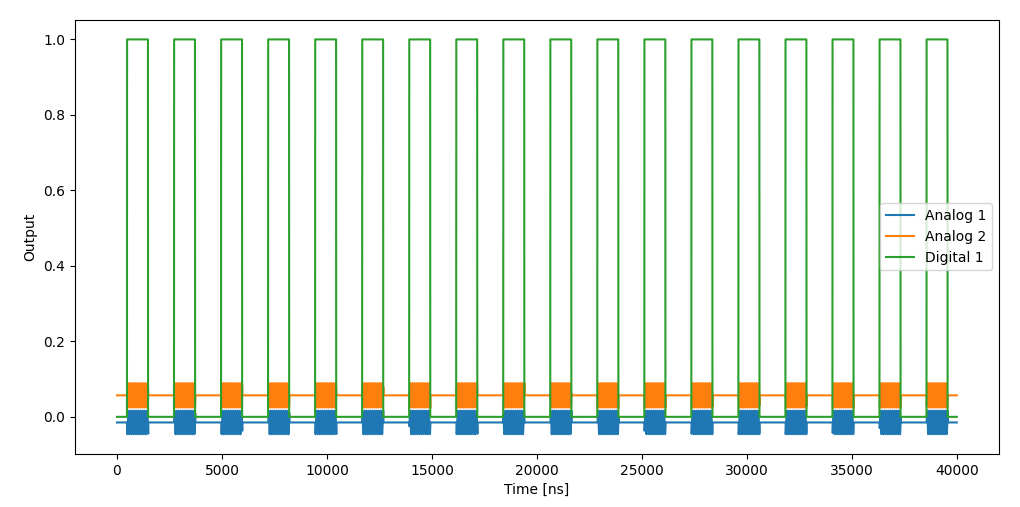

In [66]:
%matplotlib qt

#Sets the pulse length and the pulse amplitude at the resonator 
pulse_len=100_000
config,qm=update_readout_lenght(pulse_len,config,qmm)

#number of average 
n_avg = 1000

#Waiting time before succesive readout 
cooldown_time = 100_000 // 4

#If frequency sweep of the resonator 

f_min =149.8e6-0.25e6
f_max =149.8e6+0.25e6
df = 0.001e6   #0.001e6 #0.001e6
freqs = np.arange(f_min, f_max + 0.1, df)  # + 0.1 to add f_max to freqs



amp_factor=0.005 #amplitude factor 

In [67]:
%%time 

with program() as resonator_spec:
    
    n = declare(int)
    f = declare(int)
    I = declare(fixed)
    Q = declare(fixed)
    I_st = declare_stream()
    Q_st = declare_stream()
    n_st= declare_stream()

    with for_(n, 0, n < n_avg, n + 1):
        
        with for_(f, f_min, f <= f_max, f + df):  # Notice it's <= to include f_max (This is only for integers!)
            
            update_frequency("resonator", f)
            
            measure(
                "cw"*amp(amp_factor),
                "resonator",
                None,
                dual_demod.full("cos", "out1", "sin", "out2", I),
                dual_demod.full("minus_sin", "out1", "cos", "out2", Q),
            )
            
            wait(cooldown_time, "resonator") #Waiting time between sucessive measure 
            
            save(I, I_st)
            save(Q, Q_st)
            
        save(n, n_st)

    with stream_processing():
        
        I_st.buffer(len(freqs)).average().save("I") #Fills all the buffer frequency and then average the sucessive 
        Q_st.buffer(len(freqs)).average().save("Q")
        n_st.save("iteration")
        
simulate = False

if simulate:
    
    simulation_config = SimulationConfig(duration=10000)
    job = qmm.simulate(config, resonator_spec, simulation_config)
    job.get_simulated_samples().con1.plot(analog_ports={'1','2'},digital_ports={'1'})

else:
    
    qm = qmm.open_qm(config)
    job = qm.execute(resonator_spec)

    # Get results from QUA program
    results = fetching_tool(job, data_list=["I", "Q", "iteration"], mode="live")
    
    # Live plotting
    fig = plt.figure()
    interrupt_on_close(fig, job)  # Interrupts the job when closing the figure
    
    while results.is_processing():
        # Fetch results
        I, Q, iteration = results.fetch_all()
        progress_counter(iteration, n_avg, start_time=results.get_start_time())
        
        # Plot results
        plt.subplot(211)
        plt.cla()
        plt.title("resonator spectroscopy amplitude")
        plt.plot(freqs / u.MHz, 20*np.log10(np.sqrt(I**2 + Q**2)/(amp_factor)), ".")
        plt.xlabel("frequency [MHz]")
        plt.ylabel(r"$\sqrt{I^2 + Q^2}$ [a.u.]")
        plt.subplot(212)
        plt.cla()
        # detrend removes the linear increase of phase
        phase = signal.detrend(np.unwrap(np.angle(I + 1j * Q)))
        plt.title("resonator spectroscopy phase")
        plt.plot(freqs / u.MHz, phase, ".")
        plt.xlabel("frequency [MHz]")
        plt.ylabel("Phase [rad]")
        plt.pause(0.1)
        plt.tight_layout()

    # Fetch results
    I, Q, iteration = results.fetch_all()
    
    # Convert I & Q to Volts
    I = u.demod2volts(I, pulse_len)
    Q = u.demod2volts(Q, pulse_len)
    
    # 1D spectroscopy plot
    plt.clf()
    plt.subplot(211)
    plt.title("resonator spectroscopy amplitude [V]")
    plt.plot(freqs / u.MHz, 20*np.log10(np.sqrt(I**2 + Q**2)/(amp_factor)), ".")
    plt.xlabel("frequency [MHz]")
    plt.ylabel(r"$\sqrt{I^2 + Q^2}$ [a.u.]")
    plt.subplot(212)
    # detrend removes the linear increase of phase
    phase = signal.detrend(np.unwrap(np.angle(I + 1j * Q)))
    plt.title("resonator spectroscopy phase [rad]")
    plt.plot(freqs / u.MHz, phase, ".")
    plt.xlabel("frequency [MHz]")
    plt.ylabel("Phase [rad]")
    plt.tight_layout()     
        


2023-07-04 10:08:47,580 - qm - INFO - Flags: 
2023-07-04 10:08:47,581 - qm - INFO - Sending program to QOP
2023-07-04 10:08:49,323 - qm - INFO - Executing program
Execution stopped by user!                                   ] 11.9% (n=119/1000) --> elapsed time: 11.85s
Wall time: 14.4 s                                            ] 12.1% (n=121/1000) --> elapsed time: 12.05s


In [15]:
#Plot of the data 
%matplotlib qt
fig = plt.figure()
plt.subplot(211)
phase = signal.detrend(np.unwrap(np.angle(I + 1j * Q)))
plt.title("resonator spectroscopy amplitude [V]")
plt.plot(freqs / u.MHz, 20*np.log10(np.sqrt(I**2 + Q**2)/(amp_factor)), ".")
plt.xlabel("frequency [MHz]")
plt.ylabel(r"$\sqrt{I^2 + Q^2}$ [dB]")
plt.subplot(212)
plt.plot(freqs / u.MHz, phase, ".")
plt.xlabel("frequency [MHz]")
plt.ylabel("Phase [rad]")
plt.tight_layout()   


## Saving 

In [26]:
#Saving the trace

#Saving the data
cooldown_date=Cooldown_Date #top folder 
device="Spectroscopy_QM" #second folder 
name="single_trace" # third folder 
meastype="20_06_2023_pi_6_0p15_lesspoints" #Final file name 

datadict={}
datadict["I"]=I
datadict["Q"]=Q
datadict["freqs"]=freqs
datadict["amp_factor"]=amp_factor
datadict["octave_gain"]=octave_output_gain
datadict["n_avg"]=n_avg
datadict["cooldown_time"]=cooldown_time
datadict["pulse_len"]=pulse_len
datadict["pulse_amp "]=pulse_amp 
datadict["LO"]=LO_readout
datadict["config"]=config 

an.save_with_numpy(datadict, meastype, name, device, cooldown_date, filepath=Saving_Path)  

saving in new directory


In [17]:
#loading the data 
filepath=r"X:\Users\beaulieu\Data\Run01\131\2023_05_05\Spectroscopy_QM\single_trace\17_05_2023_pi_6_0p15.npz"

npzfile=np.load(filepath,allow_pickle=True)
npzfile["multidata"][()]
freqs=npzfile["multidata"][()]["freqs"]
I=npzfile["multidata"][()]["I"]
Q=npzfile["multidata"][()]["Q"]
amp_factor=npzfile["multidata"][()]["amp_factor"]


## Analysis of single trace 

In [18]:
%matplotlib qt
# fit the resonance 
save_data=False 

port=circuit.notch_port()
port.add_data(freqs+LO_readout,I+ 1j*Q)
port.autofit()
port.plotall()
print(port.fitresults)
Coupling=port.fitresults["fr"]/port.fitresults['absQc']
print('The coupling in kHz {}'.format(Coupling/1e3))
print('The external quality factor {}'.format(port.fitresults['absQc']))
print('The internal quality factor {}'.format(port.fitresults['Qi_no_corr']))
print("The resonance frequency is {}".format(port.fitresults["fr"]/1e9))

if save_data:
    cooldown_date=Cooldown_Date #top folder 
    device="Spectroscopy_QM" #second folder 
    name="single_trace" # third folder 
    meastype="filename" #Final file name 

    datadict={}
    datadict["I"]=I
    datadict["Q"]=Q
    datadict["freqs"]=freqs
    datadict["amp_factor"]=amp_factor
    datadict["octave_gain"]=octave_output_gain
    datadict["n_avg"]=n_avg
    datadict["cooldown_time"]=cooldown_time
    datadict["pulse_len"]=pulse_len
    datadict["pulse_amp "]=pulse_amp 
    datadict["LO"]=LO_readout
    datadict["config"]=config 
    datadict["fit_result"]=port.fitresults

    an.save_with_numpy(datadict, meastype, name, device, cooldown_date, filepath=Saving_Path)  

{'Qi_dia_corr': 161807.3973657866, 'Qi_no_corr': 169655.7871188206, 'absQc': 66870.0714162952, 'Qc_dia_corr': 68173.41937385678, 'Ql': 47964.71164331062, 'fr': 4349733516.2729225, 'theta0': -2.9457388577736308, 'phi0': 0.1958537958161622, 'phi0_err': 0.010371984467994356, 'Ql_err': 659.1583187116204, 'absQc_err': 687.9587966775547, 'fr_err': 626.4091353478693, 'chi_square': 0.0015111149512725887, 'Qi_no_corr_err': 5814.061089979137, 'Qi_dia_corr_err': 5368.842963050215}
The coupling in kHz 65.04753807116407
The external quality factor 66870.0714162952
The internal quality factor 169655.7871188206
The resonance frequency is 4.349733516272923


# Repeated Spectroscopy 

In [5]:
   
def SingleResonatorSpec(n_avg, cooldown_time, f_min, f_max, df, amp_factor): 
    
    with program() as resonator_spec:

        n = declare(int)
        f = declare(int)
        I = declare(fixed)
        Q = declare(fixed)
        I_st = declare_stream()
        Q_st = declare_stream()
        n_st= declare_stream()

        with for_(n, 0, n < n_avg, n + 1):

            with for_(f, f_min, f <= f_max, f + df):  # Notice it's <= to include f_max (This is only for integers!)

                update_frequency("resonator", f)

                measure(
                    "cw"*amp(amp_factor),
                    "resonator",
                    None,
                    dual_demod.full("cos", "out1", "sin", "out2", I),
                    dual_demod.full("minus_sin", "out1", "cos", "out2", Q),
                )

                wait(cooldown_time, "resonator") #Waiting time between sucessive measure 

                save(I, I_st)
                save(Q, Q_st)

            save(n, n_st)

        with stream_processing():

            I_st.buffer(len(freqs)).average().save("I") #Fills all the buffer frequency and then average the sucessive 
            Q_st.buffer(len(freqs)).average().save("Q")
            n_st.save("iteration")

    simulate = False

    if simulate:

        simulation_config = SimulationConfig(duration=10000)
        job = qmm.simulate(config, resonator_spec, simulation_config)
        job.get_simulated_samples().con1.plot(analog_ports={'1','2'},digital_ports={'1'})

    else:

        qm = qmm.open_qm(config)
        job = qm.execute(resonator_spec)

        # Get results from QUA program
        results = fetching_tool(job, data_list=["I", "Q", "iteration"], mode="live")

        # Live plotting
        fig = plt.figure()
        interrupt_on_close(fig, job)  # Interrupts the job when closing the figure

        while results.is_processing():
            # Fetch results
            I, Q, iteration = results.fetch_all()
            progress_counter(iteration, n_avg, start_time=results.get_start_time())

            # Plot results
            plt.subplot(211)
            plt.cla()
            plt.title("resonator spectroscopy amplitude")
            plt.plot(freqs / u.MHz, 20*np.log10(np.sqrt(I**2 + Q**2)/(amp_factor)), ".")
            plt.xlabel("frequency [MHz]")
            plt.ylabel(r"$\sqrt{I^2 + Q^2}$ [a.u.]")
            plt.subplot(212)
            plt.cla()
            # detrend removes the linear increase of phase
            phase = signal.detrend(np.unwrap(np.angle(I + 1j * Q)))
            plt.title("resonator spectroscopy phase")
            plt.plot(freqs / u.MHz, phase, ".")
            plt.xlabel("frequency [MHz]")
            plt.ylabel("Phase [rad]")
            plt.pause(0.1)
            plt.tight_layout()

        # Fetch results
        I, Q, iteration = results.fetch_all()

        # Convert I & Q to Volts
        I = u.demod2volts(I, pulse_len)
        Q = u.demod2volts(Q, pulse_len)
        
    return freqs,I,Q

   

In [6]:
%matplotlib qt

#Sets the pulse length and the pulse amplitude at the resonator 
pulse_len=100_000
config,qm=update_readout_lenght(pulse_len,config,qmm)

#number of average 
n_avg = 500

#Waiting time before succesive readout 
cooldown_time = 100_000 // 4

#If frequency sweep of the resonator 

f_min =149.8e6-0.25e6
f_max =149.8e6+0.25e6
df = 0.001e6   #0.001e6 #0.001e6
freqs = np.arange(f_min, f_max + 0.1, df)  # + 0.1 to add f_max to freqs

amp_factor=0.005 #amplitude factor 


n_repetition=2000
waiting_time= 120 #waiting time in seconds 

In [7]:

%matplotlib qt
start=time.time()
resonance_list=[]
error_list=[]
time_list=[]

Data={}


for i in range(n_repetition): 
    
    freqs,I,Q=SingleResonatorSpec(n_avg, cooldown_time, f_min, f_max, df, amp_factor)
    plt.close()
    
    end=time.time()
    current_time=end-start
    Data[i]={}
    

    
    Data[i]["freqs"]=freqs
    Data[i]["I"]=I
    Data[i]["Q"]=Q
    
    port=circuit.notch_port()
    port.add_data(freqs+LO_readout,I+ 1j*Q)
    port.autofit()

    
    resonance_list.append(port.fitresults["fr"]/1e9)
    error_list.append(port.fitresults['fr_err']/1e9)
    time_list.append(current_time/60)
    
    plt.plot(np.array(time_list),(np.array(resonance_list)-4.3497)*1e9,".")
    plt.draw()
    plt.pause(0.0001)  
    time.sleep(waiting_time)
    print("After {} min, the resonance is at {} GHz".format(current_time/60,port.fitresults["fr"]/1e9))
    
    
    
    

2023-07-05 14:36:30,678 - qm - INFO - Flags: 
2023-07-05 14:36:30,678 - qm - INFO - Sending program to QOP
2023-07-05 14:36:32,597 - qm - INFO - Executing program
Progress: [##################################################] 100.0% (n=500/500) --> elapsed time: 49.61s
Progress: [##################################################] 100.0% (n=500/500) --> elapsed time: 49.78s
Execution stopped by user!
After 0.878007157643636 min, the resonance is at 4.349801450194804 GHz
2023-07-05 14:39:26,121 - qm - INFO - Flags: 
2023-07-05 14:39:26,121 - qm - INFO - Sending program to QOP
2023-07-05 14:39:27,905 - qm - INFO - Executing program
Progress: [##################################################] 100.0% (n=500/500) --> elapsed time: 51.73s
Execution stopped by user!
After 3.829513132572174 min, the resonance is at 4.3498006589880776 GHz
2023-07-05 14:42:24,368 - qm - INFO - Flags: 
2023-07-05 14:42:24,368 - qm - INFO - Sending program to QOP
2023-07-05 14:42:26,162 - qm - INFO - Executing p

KeyboardInterrupt: 

In [13]:
plt.plot(np.array(time_list),(np.array(resonance_list)-4.3498)*1e9,".")

In [15]:
%matplotlib qt

fig, axs= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=100)
axs.plot(np.array(time_list),(np.array(resonance_list)-4.3498)*1e9,".")
axs.set_xlabel("time [min]")
axs.set_ylabel("Resonance shift [Hz]")
plt.grid()
axs.set_ylim(-5000,15000)

(-5000.0, 15000.0)

In [ ]:
Cooldown_Date

In [17]:
cooldown_date=Cooldown_Date #top folder 
device="Calibration" #second folder 
name="frequency" # third folder 
meastype="04_07_2023_resonance_shift_keithley_second" #Final file name 

datadict={}

datadict["Data"]=Data
datadict["freqs"]=freqs
datadict["amp_factor"]=amp_factor
datadict["octave_gain"]=octave_output_gain
datadict["n_avg"]=n_avg
datadict["cooldown_time"]=cooldown_time
datadict["pulse_len"]=pulse_len
datadict["pulse_amp "]=pulse_amp 
datadict["LO"]=LO_readout
datadict["config"]=config 
datadict["time_list"]=time_list
datadict["resonance_list"]=resonance_list

an.save_with_numpy(datadict, meastype, name, device, cooldown_date, filepath=Saving_Path)  

saving


In [83]:
filepath=r"X:\Users\beaulieu\Data\Run01\131\2023_06_01\Calibration\frequency\04_07_2023_resonance_shift_QDAC.npz"

npzfile=np.load(filepath,allow_pickle=True)
npzfile["multidata"][()]
time_list=npzfile["multidata"][()]["time_list"]
resonance_list=npzfile["multidata"][()]["resonance_list"]
